In [116]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from matplotlib import rcParams
from matplotlib.lines import Line2D
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=10

In [117]:
infile_path = '/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/gwas_enrichments/monocyte_microglia_quantiles'

In [125]:
def plotEnrichmentsFromDf(df, title):
    df['Decile'] = df['Name'].apply(lambda x: int(x.split("_")[-1]))
    df['cell_type'] = df['Name'].apply(lambda x: x.split("_decile_")[0])
    for cell_type in df['cell_type'].unique():
        df_cell_type = df.loc[df['cell_type']==cell_type ]
        
        if cell_type=='encode_monocyte':
            color = 'C0'
        elif cell_type=='gosselin_microglia':
            color = 'C1'
        plot,_,_ = plt.errorbar(df_cell_type['Decile'],
                     y=df_cell_type["Coefficient"],
                     yerr=df_cell_type["Coefficient_std_error"],
                     fmt='o',
                     capsize=5,
                     ecolor=color,
                     markerfacecolor=color,
                     markeredgecolor=color)
        
            
    plt.ylim(df['Coefficient'].min()-1e-6,
            df['Coefficient'].max()+1e-6
            ) 
    plt.xlabel('Peak signal value decile')
    plt.ylabel('S-LDSC coefficient')
        
    plt.legend(
        loc="upper right",
        handles=[
            Line2D([], [], c='C0', label="encode_monocyte"),
            Line2D([], [], c='C1', label="gosselin_microglia"),
        ]
    )
    plt.title(title)
    plt.show()

In [126]:
kunkle_enrichments_merged_bg = pd.read_csv(os.path.join(infile_path,'kunkle_enrichments.cell_type_results.txt'),
                                           sep='\t'
                                          )
kunkle_enrichments_indiv_bg = pd.read_csv(os.path.join(infile_path,'kunkle_enrichments_indiv_bg.cell_type_results.txt'),
                                           sep='\t'
                                          )

jansen_enrichments_merged_bg = pd.read_csv(os.path.join(infile_path,'jansen_enrichments.cell_type_results.txt'),
                                           sep='\t'
                                          )
jansen_enrichments_indiv_bg = pd.read_csv(os.path.join(infile_path,'jansen_enrichments_indiv_bg.cell_type_results.txt'),
                                           sep='\t'
                                          )

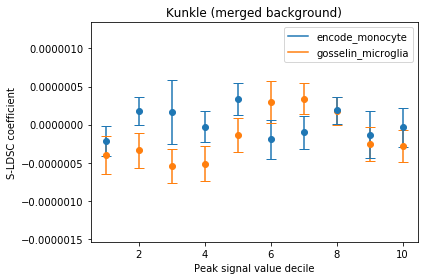

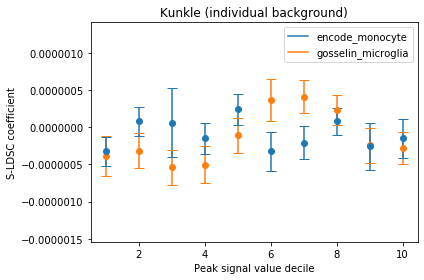

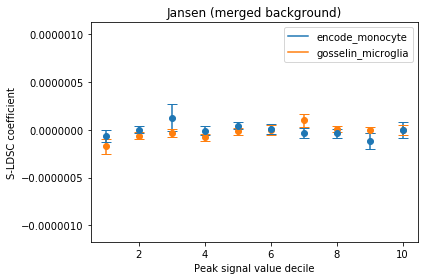

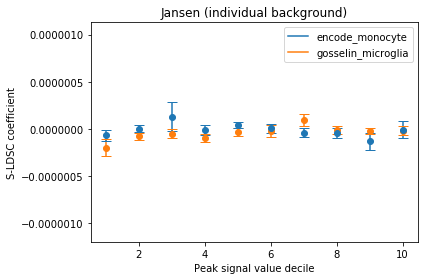

In [127]:
plotEnrichmentsFromDf(kunkle_enrichments_merged_bg, 'Kunkle (merged background)')
plotEnrichmentsFromDf(kunkle_enrichments_indiv_bg, 'Kunkle (individual background)')
plotEnrichmentsFromDf(jansen_enrichments_merged_bg, 'Jansen (merged background)')
plotEnrichmentsFromDf(jansen_enrichments_indiv_bg, 'Jansen (individual background)')